# Craft Beers Dataset Analysis
This notebook contains data from the [Craft Beers Dataset](https://www.kaggle.com/nickhould/craft-cans) obtained from Kaggle. The dataset contains two files, one with information on breweries and one with information on induvidual beers.
## Project Goals
The goal for this project is to explore the dataset to identify information about the market of craft beer brewers and their beers. I will use this notebook to showcase skills in data manipulation and visualization.

## Initial Data Preperation

Import the necessary python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Load in the data files and give a preview of each

In [4]:
beers = pd.read_csv('beers.csv')

In [76]:
beers.head()

,Unnamed: 0,abv,ibu,beer_id,beer_name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [6]:
breweries = pd.read_csv('breweries.csv')

In [81]:
breweries.head()

,Unnamed: 0,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA


Change some of the column names to be easier to understand

In [73]:
beers.rename(columns={'id': 'beer_id', 'name': 'beer_name'}, inplace=True)

In [80]:
beers.head()

,Unnamed: 0,abv,ibu,beer_id,beer_name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


Set the index for the brewery dataframe and merge the two dataframes together

In [86]:
# Create a column for the brewery index
breweries['brewery_id'] = breweries.index

# Merge the two dataframes together based on brewery ID
df = beers.merge(breweries, on='brewery_id')

In [87]:
df.head()

,Unnamed: 0_x,abv,ibu,beer_id,beer_name,style,brewery_id,ounces,Unnamed: 0_y,name,city,state
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,408,10 Barrel Brewing Company,Bend,OR
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,177,18th Street Brewery,Gary,IN
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,177,18th Street Brewery,Gary,IN
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,177,18th Street Brewery,Gary,IN
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,177,18th Street Brewery,Gary,IN


Drop the unnecessary columns

In [92]:
df.drop(labels=['Unnamed: 0_x', 'Unnamed: 0_y'], axis=1, inplace=True)

In [93]:
df.head()

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces,name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


# Exploratory Data Analysis
## Exploration of the Breweries

Explore the breweries file and provide insight on brewery locations.

In [94]:
df.head(10)

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces,name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN
5,0.077,NaN,2261,Black Exodus,Oatmeal Stout,177,12.0,18th Street Brewery,Gary,IN
6,0.045,NaN,2260,Lake Street Express,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
7,0.065,NaN,2259,Foreman,American Porter,177,12.0,18th Street Brewery,Gary,IN
8,0.055,NaN,2258,Jade,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
9,0.086,NaN,2131,Cone Crusher,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN


In [53]:
breweries.isnull().sum()

Unnamed: 0    0
name          0
city          0
state         0
dtype: int64

In [12]:
print('Number of records:', breweries.shape[0])

Number of records: 558


The breweries file contains 558 records, with 4 columns including the name, city, and state of the breweries.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]),
 <a list of 51 Text xticklabel objects>)

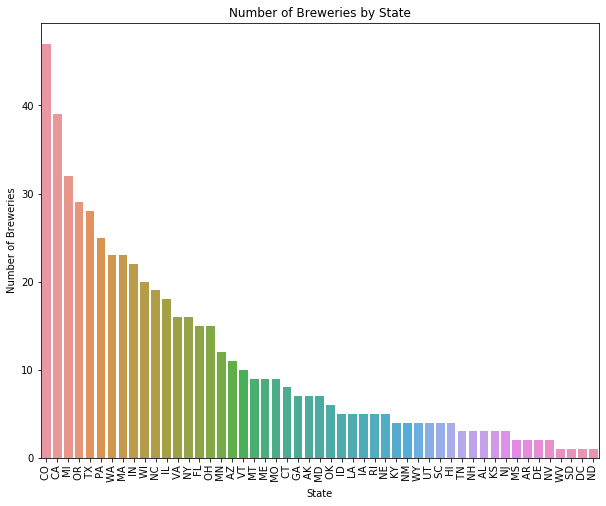

In [96]:
# Plot a bar chart with the number of breweries in each state
breweries_by_state = breweries['state'].value_counts()
plt.figure(figsize=(10,8))
sns.barplot(x=breweries_by_state.index, y=breweries_by_state.values)
plt.title('Number of Breweries by State')
plt.ylabel('Number of Breweries')
plt.xlabel('State')
plt.xticks(rotation='vertical')

All 50 states are represented in the dataset, and DC is included as well. Colorado has the most breweries in the datset, followed by California, Michigan, and then Oregon.

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

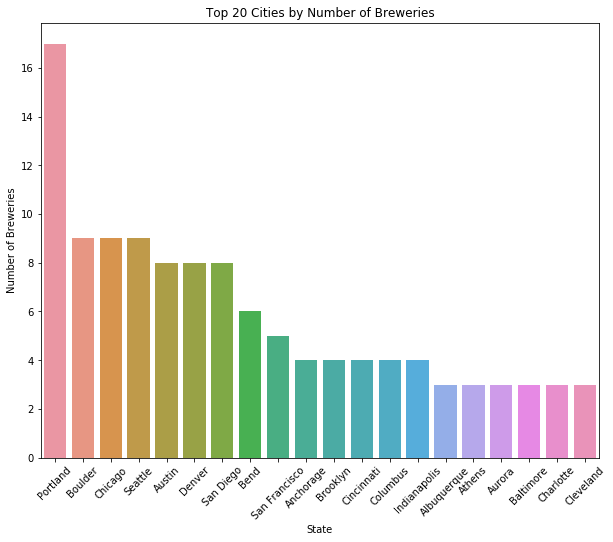

In [62]:
# Create a series that contains the number of breweries in the 20 cities with the highest brewery count
breweries_by_city = breweries.groupby('city')['name'].count().nlargest(20)
plt.figure(figsize=(10,8))
sns.barplot(x=breweries_by_city.index, y=breweries_by_city.values)
plt.title('Top 20 Cities by Number of Breweries')
plt.ylabel('Number of Breweries')
plt.xlabel('State')
plt.xticks(rotation=45)

This chart shows the top 20 cities with the most breweries. Portland, OR leads the pack with nearly twice as many as the next city, Boulder, CO.

Let's look into my home state of Washington a little more to see the breakdown of breweries

In [115]:
breweries.head()

,Unnamed: 0,name,city,state,brewery_id
0,0,NorthGate Brewing,Minneapolis,MN,0
1,1,Against the Grain Brewery,Louisville,KY,1
2,2,Jack's Abby Craft Lagers,Framingham,MA,2
3,3,Mike Hess Brewing Company,San Diego,CA,3
4,4,Fort Point Beer Company,San Francisco,CA,4


In [123]:
# Create a new dataframe with only the washington breweries
washington_breweries = breweries[breweries['state']==' WA']
print('Number of breweries located in Washington:', washington_breweries.shape[0])

Number of breweries located in Washington: 23


There are a total of 23 breweries in the dataset that are located in Washington state

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

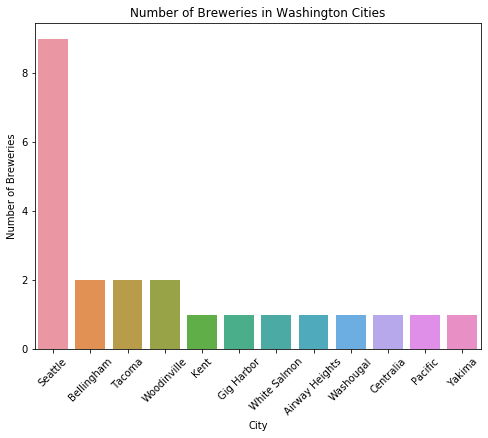

In [131]:
# Get the value counts of each washington city featured in the dataset and plot
wa_breweries_by_city = washington_breweries['city'].value_counts()
plt.figure(figsize=(8,6))
sns.barplot(x=wa_breweries_by_city.index, y=wa_breweries_by_city.values)
plt.title('Number of Breweries in Washington Cities')
plt.ylabel('Number of Breweries')
plt.xlabel('City')
plt.xticks(rotation=45)

Seattle is the hotspot for breweries in Washington state, with a total of 9.

## Exploration of the Beers

In [143]:
beers.head()

,Unnamed: 0,abv,ibu,beer_id,beer_name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [144]:
print('Total number of induvidual beers in the dataset:', beers.shape[0])

Total number of induvidual beers in the dataset: 2410


In [142]:
beers.isnull().sum()

Unnamed: 0       0
abv             62
ibu           1005
beer_id          0
beer_name        0
style            5
brewery_id       0
ounces           0
dtype: int64

In [139]:
print('Average ABV of all beers:', beers['abv'].mean())
print('Average IBU of all beers:', beers['ibu'].mean())

Average ABV of all beers: 0.05977342419080093
Average IBU of all beers: 42.71316725978647


* There are a total of 2,410 induvidal beers in the dataset
* The average ABV (Alchohol By Volume) of all the beers in the dataset is .0597, or 5.97%. There are 62 records with a missing ABV value.
* The average IBU (International Bitterness Units) of all the beers in the data set is 42.71. There are 1,005 records with a missing IBU value.

Let's look into how both the ABV and IBU of the beers in the dataset are distributed

Text(0.5, 0, 'ABV')

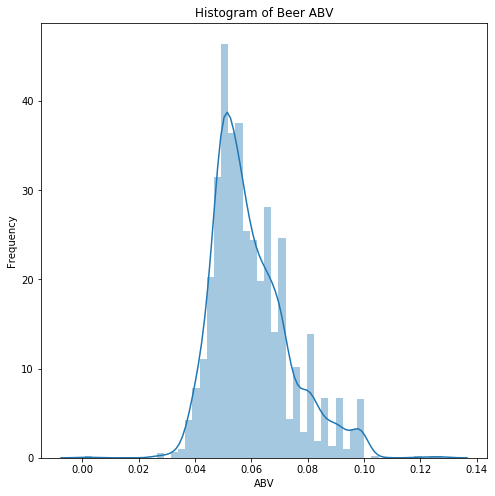

In [223]:
# Create a histogram of ABV
plt.figure(figsize=(8,8))
sns.distplot(a=beers['abv'])
plt.title('Histogram of Beer ABV')
plt.ylabel('Frequency')
plt.xlabel('ABV')

The majority of beers have an ABV around 5%

Text(0.5, 0, 'IBU')

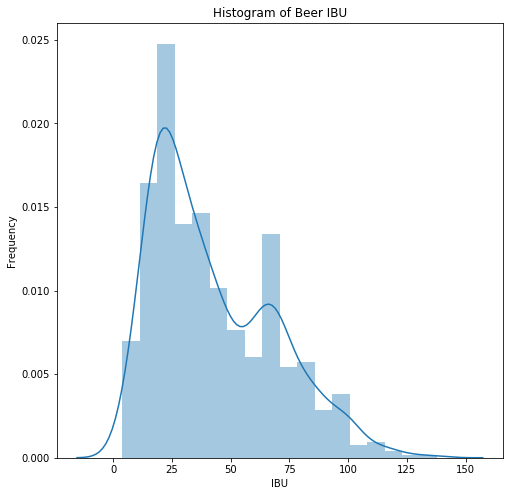

In [221]:
# Create a histogram of IBU
plt.figure(figsize=(8,8))
sns.distplot(a=beers['ibu'])
plt.title('Histogram of Beer IBU')
plt.ylabel('Frequency')
plt.xlabel('IBU')

Is the amount of alcohol and the bitterness of any given beer related? Let's find out.

Text(0, 0.5, 'IBU')

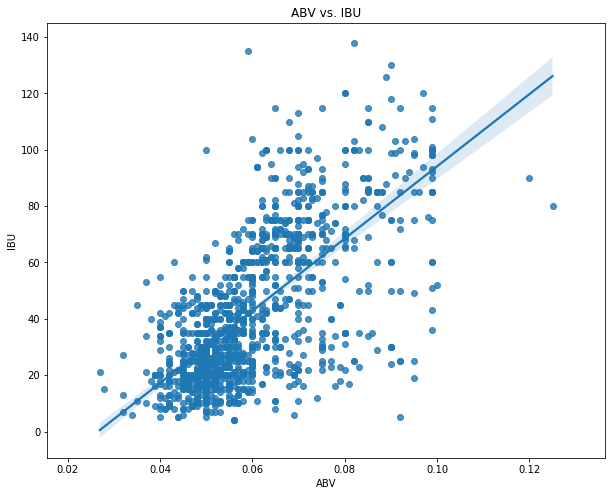

In [189]:
# Create a scatter plot comparing ABV and IBU and plot a regression line
plt.figure(figsize=(10,8))
sns.regplot(x=beers['abv'], y=beers['ibu'])
plt.title('ABV vs. IBU')
plt.xlabel('ABV')
plt.ylabel('IBU')

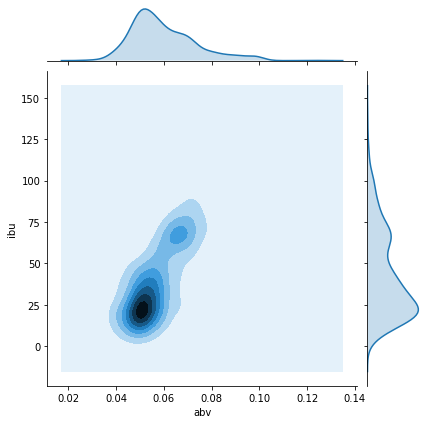

In [195]:
# Create a joint kde plot of ABV and IBU
sns.jointplot(data=beers, x='abv', y='ibu', kind='kde')

The first chart above compares ABV and IBU of the beers in the dataset and plots a regression line. As we might expect, the amount of alcohol and the bitterness of any given beer are correlated.

Let's see what the most popular styles of beers are.

In [162]:
# Create a series with the styles that have the top 20 most records in the dataframe
beers_by_type = beers['style'].value_counts().nlargest(20)
beers_by_type

American IPA                      424
American Pale Ale (APA)           245
American Amber / Red Ale          133
American Blonde Ale               108
American Double / Imperial IPA    105
American Pale Wheat Ale            97
American Brown Ale                 70
American Porter                    68
Saison / Farmhouse Ale             52
Witbier                            51
Fruit / Vegetable Beer             49
Kölsch                             42
Hefeweizen                         40
American Stout                     39
American Pale Lager                39
Cider                              37
American Black Ale                 36
German Pilsener                    36
Märzen / Oktoberfest               30
American Amber / Red Lager         29
Name: style, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]),
 <a list of 20 Text xticklabel objects>)

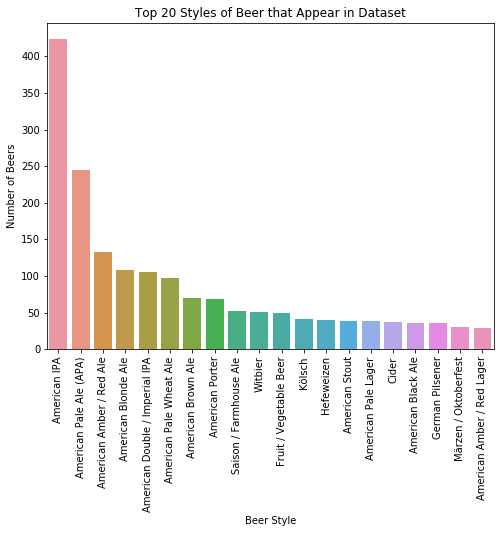

In [166]:
# Plot the top 20 most popular beer styles
plt.figure(figsize=(8,6))
sns.barplot(x=beers_by_type.index, y=beers_by_type.values)
plt.title('Top 20 Styles of Beer that Appear in Dataset')
plt.xlabel('Beer Style')
plt.ylabel('Number of Beers')
plt.xticks(rotation='vertical')

As we can see, the most popular type of beer is the American IPA, followed by the American Pale Ale

In [181]:
print('The highest ABV beer:', (beers['abv'].max() * 100), '%')
print('The lowest ABV beer:', (beers['abv'].min() * 100), '%')

The highest ABV beer: 12.8 %
The lowest ABV beer: 0.1 %


Let's look at which styles of beer have the highest average ABV

In [183]:
print('The highest IBU beer:', beers['ibu'].max())
print('The lowest IBU beer:', beers['ibu'].min())

The highest IBU beer: 138.0
The lowest IBU beer: 4.0


In [203]:
highest_avg_abv = beers.groupby('style')[['abv']].mean().nlargest(10, columns='abv')
highest_avg_abv.sort_values(by='abv', ascending=False)

,abv
style,
English Barleywine,0.107667
Quadrupel (Quad),0.104000
American Barleywine,0.099000
American Malt Liquor,0.099000
Russian Imperial Stout,0.097636
American Double / Imperial Stout,0.093667
American Double / Imperial IPA,0.087369
Tripel,0.086818
Baltic Porter,0.085167


In [206]:
highest_avg_ibu = beers.groupby('style')[['ibu']].mean().nlargest(10, columns='ibu')
highest_avg_ibu.sort_values(by='ibu', ascending=False)

,ibu
style,
American Barleywine,96.000000
American Double / Imperial IPA,93.320000
Russian Imperial Stout,86.500000
American Double / Imperial Pilsner,85.000000
Belgian Strong Dark Ale,72.000000
American Black Ale,68.900000
American IPA,67.634551
English Barleywine,66.666667
English Stout,66.000000


Maybe you prefer a beer that is not so bitter. This list will help you pick a style that on average has a low IBU.

In [208]:
lowest_avg_ibu = beers.groupby('style')[['ibu']].mean().nsmallest(10, columns='ibu')
lowest_avg_ibu.sort_values(by='ibu', ascending=True)

,ibu
style,
Berliner Weissbier,7.800000
Gose,9.428571
American Adjunct Lager,11.000000
Light Lager,11.666667
Fruit / Vegetable Beer,14.200000
Dunkelweizen,16.000000
English Pale Mild Ale,16.000000
Other,16.000000
Witbier,16.208333


## Exploring the Merged Dataframe

In [224]:
df.head()

,abv,ibu,beer_id,beer_name,style,brewery_id,ounces,name,city,state
0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,10 Barrel Brewing Company,Bend,OR
1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,18th Street Brewery,Gary,IN
2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,18th Street Brewery,Gary,IN
3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,18th Street Brewery,Gary,IN
4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,18th Street Brewery,Gary,IN


Which states brew beer with the highest average ABV?

In [252]:
avg_abv_by_state = df.groupby('state')[['abv']].mean().sort_values(by='abv', ascending=False)

Text(0.5, 0, 'ABV')

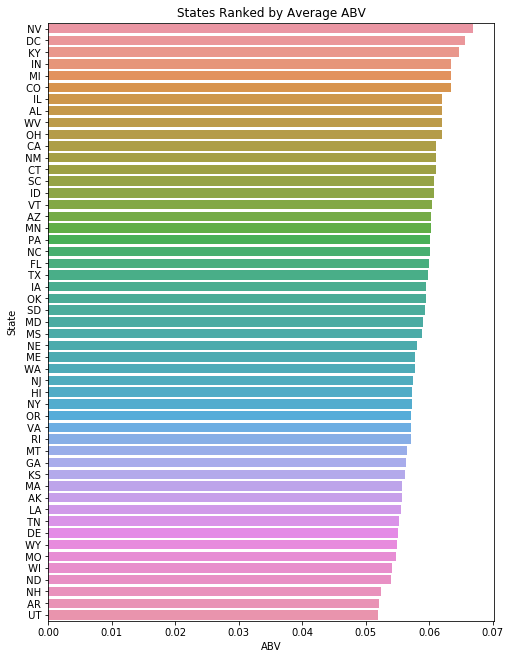

In [259]:
plt.figure(figsize=(8,11))
sns.barplot(y=avg_abv_by_state.index, x=avg_abv_by_state['abv'], orient='horizontal')
plt.title('States Ranked by Average ABV')
plt.ylabel('State')
plt.xlabel('ABV')

Text(0.5, 0, 'IBU')

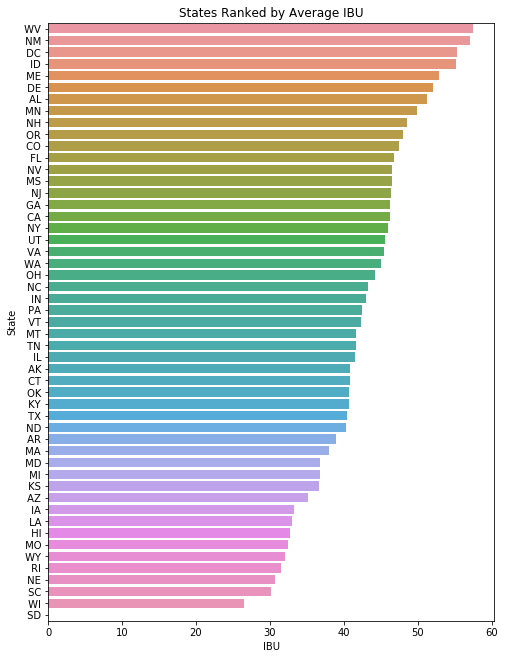

In [260]:
avg_ibu_by_state = df.groupby('state')[['ibu']].mean().sort_values(by='ibu', ascending=False)

plt.figure(figsize=(8,11))
sns.barplot(y=avg_ibu_by_state.index, x=avg_ibu_by_state['ibu'], orient='horizontal')
plt.title('States Ranked by Average IBU')
plt.ylabel('State')
plt.xlabel('IBU')

* On average, Nevada has the highest average ABV in their beers, while Utah has the lowest.
* On average, West Virginia has the highest average IBU in their beers, while Wisconsin has the lowest.